In [13]:
### 6. Segmentación de los datos basado en los resultados de agrupamiento ###
# 1) Cargar librerías y datos
from sklearn.datasets import load_wine
import pandas as pd

In [15]:
wine = load_wine()
X = wine.data # contiene datos numéricos (alcohol, acidez, etc)
y = wine.target # contiene las clases reales (no se usan para el clustering)
features = wine.feature_names # es una lista con los nombres de las columnas

In [19]:
# 2) Crear df
df = pd.DataFrame(X, columns=features) # convierte los datos en una tabla de pandas, donde cada columna tiene nombre

In [23]:
# 3) Agrupar con K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Escalamos los datos
X_scaled = StandardScaler().fit_transform(X) # normaliza los datos (media = 0, std = 1)

In [27]:
# Agrupamos en 3 clusters
modelo = KMeans(n_clusters=3, random_state=42)
grupos = modelo.fit_predict(X_scaled) # Ajusta (entrena) el modelo y asigna cada fila a un grupo (0, 1 o 2).

In [35]:
# Añadimos la columna de grupos al df
df['Grupo'] = grupos

In [37]:
# 4) Analizamos cada segmento
df.groupby('Grupo').mean().round(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grupos
Grupo,,,,,,,,,,,,,,
0,12.25,1.90,2.23,20.06,92.74,2.25,2.05,0.36,1.62,2.97,1.06,2.80,510.17,0.0
1,13.13,3.31,2.42,21.24,98.67,1.68,0.82,0.45,1.15,7.23,0.69,1.70,619.06,1.0
2,13.68,2.00,2.47,17.46,107.97,2.85,3.00,0.29,1.92,5.45,1.07,3.16,1100.23,2.0


In [41]:
### Comparación de 3 diferentes algoritmos de agrupamiento ### -> KMeans, Single Linkage y Spectral Clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score

In [43]:
k = 6 # número de grupos

In [45]:
# Modelo 1: KMeans
y_kmeans = KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)

In [47]:
# Modelo 2: Single Linkage (clustering jerárquico aglomerativo)
y_linkage = AgglomerativeClustering(n_clusters=k, linkage='single').fit_predict(X_scaled)

In [49]:
# Modelo 3: Spectral Clustering
y_spectral = SpectralClustering(n_clusters=k, random_state=42, assign_labels='kmeans').fit_predict(X_scaled)

In [51]:
# Calculamos índice Silhouette para cada modelo
s_kmeans = silhouette_score(X_scaled, y_kmeans).round(3)
s_linkage = silhouette_score(X_scaled, y_linkage).round(3)
s_spectral = silhouette_score(X_scaled, y_spectral).round(3)

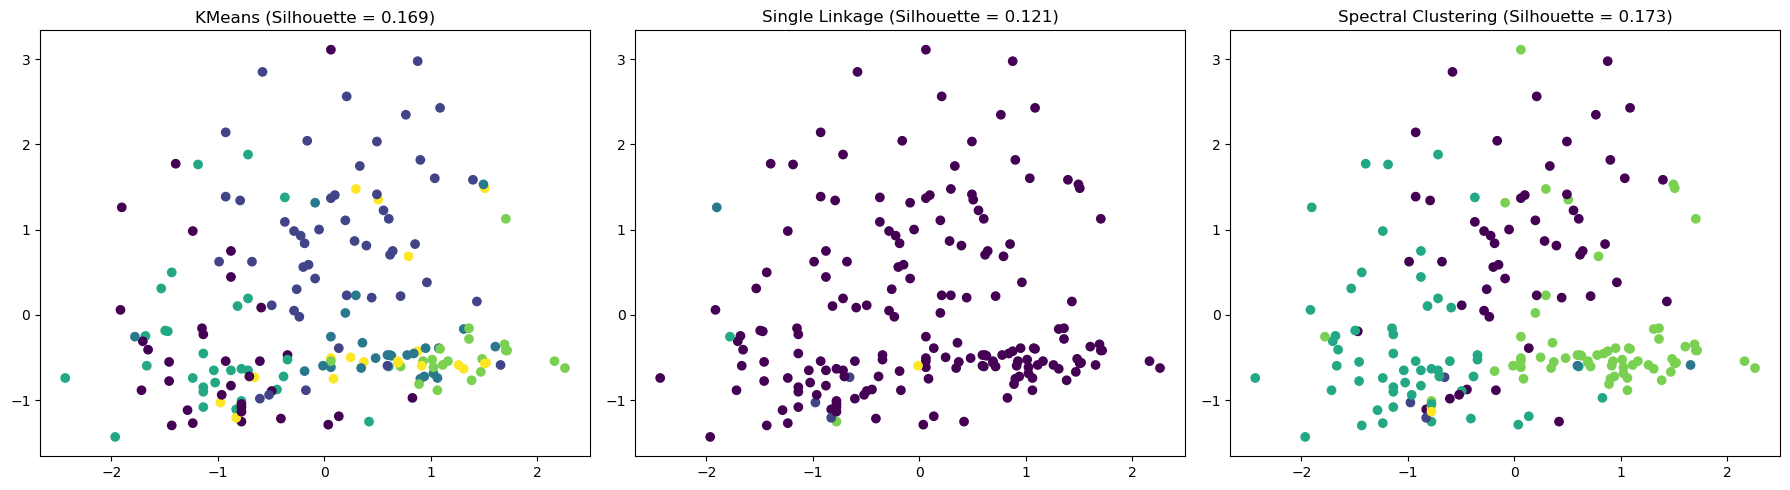

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))

# Usaremos las variables 0 y 1 (por ejemplo: alcohol y malic acid) para visualizar

ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans)
ax1.set_title(f'KMeans (Silhouette = {s_kmeans})')

ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_linkage)
ax2.set_title(f'Single Linkage (Silhouette = {s_linkage})')

ax3.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_spectral)
ax3.set_title(f'Spectral Clustering (Silhouette = {s_spectral})')

plt.tight_layout()
plt.show()